# 🎓 Library

In [1]:
# Misc
import numpy as np
import pandas as pd
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Models & tuning
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


In [2]:
# Environment variables

RAW_DATA = f"{os.getcwd()}/data"
SEED = 42

print(f"RAW_DATA: {RAW_DATA}")

RAW_DATA: /home/tofeha/ING2/ING2/FTML/FTML-Project/5.Classification_on_a_given_dataset/data


We extract our data

In [3]:
X_train = np.load(f"{RAW_DATA}/X_train.npy").astype(np.float32)
y_train = np.load(f"{RAW_DATA}/y_train.npy").astype(np.int32)

X_test = np.load(f"{RAW_DATA}/X_test.npy").astype(np.float32)
y_test = np.load(f"{RAW_DATA}/y_test.npy").astype(np.int32)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 30), (2000,), (2000, 30), (2000,))

## Correlation matrix

Let's see the correlation between the features.

In [5]:
feature_corr = np.corrcoef(X_train, rowvar=False)

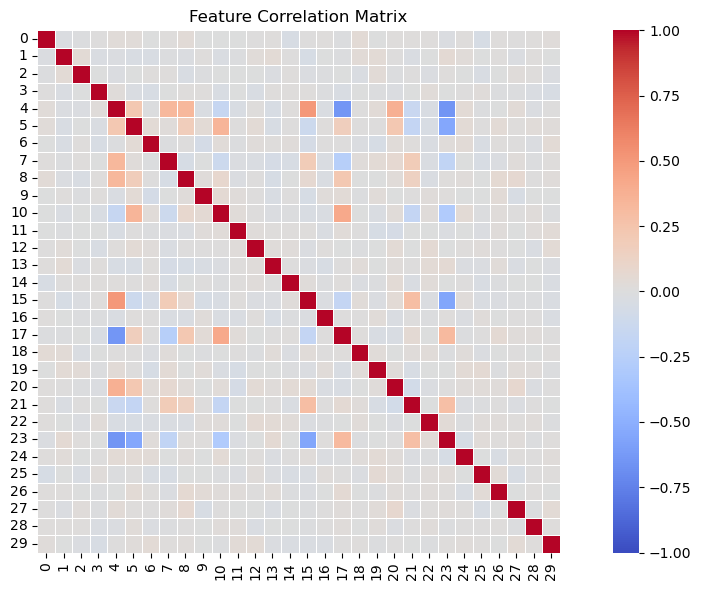

In [6]:
plt.figure(figsize=(11, 6))
sns.heatmap(feature_corr,
            annot=False,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            linewidths=0.5,
            vmin=-1,
            vmax=1)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

Interpretation of this matrix depends on the model used.

## Step 1: Preprocessing

Scalling makes most models better, but not always necessary.


In [7]:
# X_scaler = StandardScaler()

# X_train_scaled = X_scaler.fit_transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

## Step 2: Model creation

We will make a pipeline for each model, and select the best performing one.

Another way of doing this is a singular pipeline. For example:
<details>
<summary>Example here</summary>

```python
param_grid = [
    {
        "clf": [LogisticRegression(random_state=SEED)],
        "clf__penalty": ["l2"],
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    },
    {
        "clf": [RidgeClassifier(random_state=SEED)],
        "clf__alpha": [0.1, 1.0, 10.0],
        "clf__solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg"],
    },
    {
        "clf": [SVC(random_state=SEED)],
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__kernel": ["linear", "rbf", "poly", "sigmoid"],
        "clf__gamma": ["scale", "auto"]
    },
    {
        "clf": [KNeighborsClassifier()],
        "clf__n_neighbors": [3, 5, 7],
        "clf__weights": ["uniform", "distance"]
    },
    {
        "clf": [RandomForestClassifier(random_state=SEED)],
        "clf__n_estimators": [50, 100],
        "clf__max_depth": [None, 10, 20],
        "clf__min_samples_split": [2, 5],
        "clf__min_samples_leaf": [1, 2]
    },
    {
        "clf": [GradientBoostingClassifier(random_state=SEED)],
        "clf__n_estimators": [50, 100],
        "clf__learning_rate": [0.01, 0.1],
        "clf__max_depth": [3, 5]
    },
    # Add back others if you want:
    # {
    #     "clf": [MLPClassifier(random_state=SEED, max_iter=1000)],
    #     "clf__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    #     "clf__activation": ["relu", "tanh"],
    #     "clf__alpha": [0.0001, 0.001, 0.01],
    #     "clf__learning_rate_init": [0.001, 0.01]
    # },
    # {
    #     "clf": [AdaBoostClassifier(random_state=SEED)],
    #     "clf__n_estimators": [50, 100],
    #     "clf__learning_rate": [0.01, 0.1, 1]
    # },
]
```

</details>

In [ ]:
classifiers_with_params : list[tuple] = [
    (
        LogisticRegression(random_state=SEED),
        {
            "logisticregression__penalty": ["l2"],
            "logisticregression__C": [0.01, 0.1, 1, 10],
            "logisticregression__solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
        }
    ),
    (
        RidgeClassifier(random_state=SEED),
        {
            "ridgeclassifier__alpha": np.logspace(-2, 3, num=20),
            "ridgeclassifier__solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg"],
        }
    ),
    (
        SVC(random_state=SEED),
        {
            "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
            "svc__kernel": ["linear", "rbf", "poly", "sigmoid"],
            "svc__gamma": [0.01, 0.1, 1, "scale", "auto"],
        }
    ),
    (
        KNeighborsClassifier(),
        {
            "kneighborsclassifier__n_neighbors": [3, 5, 7, 11, 15, 21],
            "kneighborsclassifier__weights": ["uniform", "distance"],
            "kneighborsclassifier__p": [1, 2]
        }
    ),
    (
        RandomForestClassifier(random_state=SEED),
        {
            "randomforestclassifier__n_estimators": [50, 100],
            "randomforestclassifier__bootstrap": [True, False],
            "randomforestclassifier__max_depth": [None, 10, 20],
            "randomforestclassifier__min_samples_split": [2, 5],
            "randomforestclassifier__min_samples_leaf": [1, 2],
            "randomforestclassifier__max_features": ["sqrt", "log2"]
        }
    ),
    (
        GradientBoostingClassifier(random_state=SEED),
        {
            "gradientboostingclassifier__n_estimators": [50, 100],
            "gradientboostingclassifier__learning_rate": [0.01, 0.05, 0.1],
            "gradientboostingclassifier__max_depth": [3, 5],
            "gradientboostingclassifier__subsample": [0.6, 0.8, 1.0],
        }
    ),
    (
        MLPClassifier(random_state=SEED, max_iter=1000),
        {
            "mlpclassifier__hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "mlpclassifier__activation": ["relu", "tanh"],
            "mlpclassifier__alpha": [0.0001, 0.001, 0.01],
            "mlpclassifier__learning_rate_init": [0.001, 0.01]
        }
    ),
    (
        AdaBoostClassifier(random_state=SEED),
        {
            "adaboostclassifier__n_estimators": [50, 100],
            "adaboostclassifier__learning_rate": [0.01, 0.1, 1]
        }
    ),
]

## Step 3: Training & Evaluation

### Training

In [9]:
best_model = None
best_test_score = 0

for classifier, param_grid in classifiers_with_params:
    pipeline = make_pipeline(classifier)
    
    search_space = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    search_space.fit(X_train, y_train)

    test_score = search_space.best_estimator_.score(X_test, y_test)

    print(f"\n{classifier.__class__.__name__}")
    print(f"Best CV score: {search_space.best_score_:.4f}")
    print(f"Test score: {test_score:.4f}")
    
    if test_score > best_test_score:
        best_test_score = test_score
        # We take the model with the best set of parameters
        best_model = search_space.best_estimator_

print(f"\nBest classifier overall: {best_model.__class__.__name__} with test score = {best_test_score:.4f}")



LogisticRegression
Best CV score: 0.7145
Test score: 0.7430

RidgeClassifier
Best CV score: 0.7130
Test score: 0.7455

SVC
Best CV score: 0.8025
Test score: 0.8050

KNeighborsClassifier
Best CV score: 0.7835
Test score: 0.7865

RandomForestClassifier
Best CV score: 0.7780
Test score: 0.7790

GradientBoostingClassifier
Best CV score: 0.7695
Test score: 0.7705

MLPClassifier
Best CV score: 0.7655
Test score: 0.7780

AdaBoostClassifier
Best CV score: 0.7080
Test score: 0.7300

Best classifier overall: Pipeline with test score = 0.8050


In [31]:
model = best_model
model

Pipeline(steps=[('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.01, max_iter=1000,
                               random_state=42))])

In [32]:
y_pred = model.predict(X_test)

### Evaluation

In [33]:
model.score(X_test, y_test)

0.8085

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

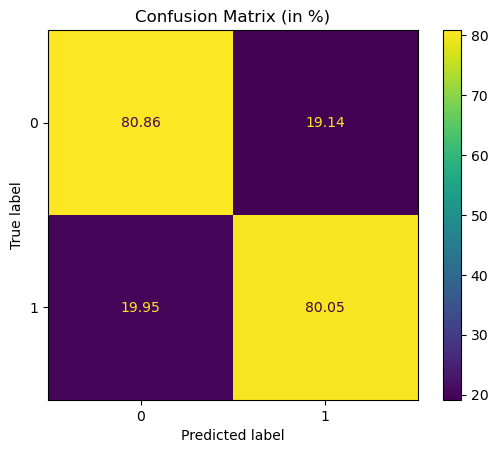

In [28]:
# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='.2f')
plt.title('Confusion Matrix (in %)')
plt.show()